In [2]:
import tensorflow as tf
import os
import tensorflow.contrib.slim as slim
from tensorflow.contrib.slim.nets import vgg
import tensorflow.contrib.slim.nets as nets
from six.moves import cPickle as pickle

In [ ]:
from datasets import dataset_utils

url = "http://download.tensorflow.org/models/inception_v1_2016_08_28.tar.gz"
checkpoints_dir = '/tmp/checkpoints'

if not tf.gfile.Exists(checkpoints_dir):
    tf.gfile.MakeDirs(checkpoints_dir)

dataset_utils.download_and_uncompress_tarball(url, checkpoints_dir)

In [2]:
checkpoints_dir = '/tmp/checkpoints'
checkpt = os.path.join(checkpoints_dir, 'vgg_16.ckpt')

X = tf.placeholder(tf.float32, [None, 224, 224, 3])
with slim.arg_scope(vgg.vgg_arg_scope()):
    logits, end_points = vgg.vgg_16(X, is_training=False)

variables_to_restore = slim.get_variables_to_restore()
init_assign_op, init_feed_dict = slim.assign_from_checkpoint(checkpt, variables_to_restore)

In [3]:
saved_weights = {}

for i in init_feed_dict:
    print(i.name)
    saved_weights[str(i.name)] = init_feed_dict[i]

placeholder/vgg_16/conv3/conv3_1/biases:0
placeholder/vgg_16/conv2/conv2_1/biases:0
placeholder/vgg_16/conv1/conv1_2/weights:0
placeholder/vgg_16/conv3/conv3_2/weights:0
placeholder/vgg_16/fc8/weights:0
placeholder/vgg_16/fc7/biases:0
placeholder/vgg_16/fc7/weights:0
placeholder/vgg_16/conv5/conv5_2/biases:0
placeholder/vgg_16/fc8/biases:0
placeholder/vgg_16/fc6/weights:0
placeholder/vgg_16/conv4/conv4_1/weights:0
placeholder/vgg_16/conv5/conv5_1/weights:0
placeholder/vgg_16/conv1/conv1_2/biases:0
placeholder/vgg_16/conv4/conv4_2/weights:0
placeholder/vgg_16/conv1/conv1_1/weights:0
placeholder/vgg_16/conv5/conv5_2/weights:0
placeholder/vgg_16/conv1/conv1_1/biases:0
placeholder/vgg_16/conv4/conv4_3/weights:0
placeholder/vgg_16/conv2/conv2_1/weights:0
placeholder/vgg_16/conv3/conv3_3/weights:0
placeholder/vgg_16/fc6/biases:0
placeholder/vgg_16/conv4/conv4_2/biases:0
placeholder/vgg_16/conv3/conv3_1/weights:0
placeholder/vgg_16/conv2/conv2_2/biases:0
placeholder/vgg_16/conv5/conv5_3/weigh

In [4]:
print(saved_weights['placeholder/vgg_16/conv4/conv4_1/weights:0'].shape)
saved_weights['placeholder/vgg_16/conv4/conv4_1/weights:0']

(3, 3, 256, 512)


array([[[[ -1.24538150e-02,   8.40655994e-03,  -5.28845051e-03, ...,
           -2.04581907e-03,  -3.92359449e-03,   1.30683812e-03],
         [  1.15566896e-02,   2.46055960e-03,  -4.09082584e-02, ...,
           -4.92062652e-03,  -1.63423386e-03,   8.94230697e-03],
         [ -1.43469922e-04,  -5.65873180e-03,   1.84066985e-02, ...,
           -2.08840682e-03,   2.63321817e-06,  -2.50728261e-02],
         ..., 
         [  1.37888230e-02,  -6.58180192e-03,   9.65370331e-03, ...,
            7.17610447e-03,   3.45725450e-03,   5.33173978e-03],
         [  2.65833316e-03,   7.77704641e-04,   2.86239345e-04, ...,
           -5.40583069e-03,   8.93119723e-03,   1.40043022e-02],
         [ -8.53933115e-03,   1.43394794e-03,  -2.91879033e-03, ...,
            3.77660524e-03,   2.05454584e-02,  -1.35868033e-02]],

        [[ -1.20176468e-02,   1.51250837e-03,   3.43130133e-03, ...,
           -1.57830697e-02,  -2.39501009e-03,   2.93573504e-03],
         [  1.07167801e-02,  -1.72885903e-03,

In [5]:
# Pickle the vgg_weights so I can reuse in other projects
pickle_file = 'vgg_weights.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'vgg_wights': saved_weights,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

# Load weights into model

In [3]:
pickle_file = 'vgg_weights.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  saved_weights = save['vgg_wights']
  del save  # hint to help gc free up memory
print('Loaded weights', len(saved_weights))

Loaded weights 32


In [ ]:
# Don't use tf.Variable because Memory blows up while back-propping the gradient
# Vgg is very memory intensive
'''
  conv1_w1 = tf.Variable(saved_weights['placeholder/vgg_16/conv1/conv1_1/weights:0'])
  conv1_b1 = tf.Variable(saved_weights['placeholder/vgg_16/conv1/conv1_1/biases:0'])
  conv1_w2 = tf.Variable(saved_weights['placeholder/vgg_16/conv1/conv1_2/weights:0'])
  conv1_b2 = tf.Variable(saved_weights['placeholder/vgg_16/conv1/conv1_2/biases:0']) 
  conv2_w1 = tf.Variable(saved_weights['placeholder/vgg_16/conv2/conv2_1/weights:0'])
  conv2_b1 = tf.Variable(saved_weights['placeholder/vgg_16/conv2/conv2_1/biases:0'])
  conv2_w2 = tf.Variable(saved_weights['placeholder/vgg_16/conv2/conv2_2/weights:0'])
  conv2_b2 = tf.Variable(saved_weights['placeholder/vgg_16/conv2/conv2_2/biases:0'])

  conv3_w1 = tf.Variable(saved_weights['placeholder/vgg_16/conv3/conv3_1/weights:0'])
  conv3_b1 = tf.Variable(saved_weights['placeholder/vgg_16/conv3/conv3_1/biases:0'])
  conv3_w2 = tf.Variable(saved_weights['placeholder/vgg_16/conv3/conv3_2/weights:0'])
  conv3_b2 = tf.Variable(saved_weights['placeholder/vgg_16/conv3/conv3_2/biases:0'])
  conv3_w3 = tf.Variable(saved_weights['placeholder/vgg_16/conv3/conv3_3/weights:0'])
  conv3_b3 = tf.Variable(saved_weights['placeholder/vgg_16/conv3/conv3_3/biases:0'])

  conv4_w1 = tf.Variable(saved_weights['placeholder/vgg_16/conv4/conv4_1/weights:0'])
  conv4_b1 = tf.Variable(saved_weights['placeholder/vgg_16/conv4/conv4_1/biases:0'])
  conv4_w2 = tf.Variable(saved_weights['placeholder/vgg_16/conv4/conv4_2/weights:0'])
  conv4_b2 = tf.Variable(saved_weights['placeholder/vgg_16/conv4/conv4_2/biases:0'])
  conv4_w3 = tf.Variable(saved_weights['placeholder/vgg_16/conv4/conv4_3/weights:0'])
  conv4_b3 = tf.Variable(saved_weights['placeholder/vgg_16/conv4/conv4_3/biases:0'])

  conv5_w1 = tf.Variable(saved_weights['placeholder/vgg_16/conv5/conv5_1/weights:0'])
  conv5_b1 = tf.Variable(saved_weights['placeholder/vgg_16/conv5/conv5_1/biases:0'])
  conv5_w2 = tf.Variable(saved_weights['placeholder/vgg_16/conv5/conv5_2/weights:0'])
  conv5_b2 = tf.Variable(saved_weights['placeholder/vgg_16/conv5/conv5_2/biases:0'])
  conv5_w3 = tf.Variable(saved_weights['placeholder/vgg_16/conv5/conv5_3/weights:0'])
  conv5_b3 = tf.Variable(saved_weights['placeholder/vgg_16/conv5/conv5_3/biases:0'])

  c6_w = tf.Variable(saved_weights['placeholder/vgg_16/fc6/weights:0'])
  c6_b = tf.Variable(saved_weights['placeholder/vgg_16/fc6/biases:0'])
  c7_w = tf.Variable(saved_weights['placeholder/vgg_16/fc7/weights:0'])
  c7_b = tf.Variable(saved_weights['placeholder/vgg_16/fc7/biases:0'])
  c8_w = tf.Variable(saved_weights['placeholder/vgg_16/fc8/weights:0'])
  c8_b = tf.Variable(saved_weights['placeholder/vgg_16/fc8/biases:0'])
'''

In [121]:

graph = tf.Graph()

with graph.as_default():
    
  tf_train_dataset = tf.placeholder(tf.float32, shape=(1, 224, 224, 3))

  # Use tf.constant to save memory; basically this freezes the weights
  conv1_w1 = tf.constant(saved_weights['placeholder/vgg_16/conv1/conv1_1/weights:0'])
  conv1_b1 = tf.constant(saved_weights['placeholder/vgg_16/conv1/conv1_1/biases:0'])
  conv1_w2 = tf.constant(saved_weights['placeholder/vgg_16/conv1/conv1_2/weights:0'])
  conv1_b2 = tf.constant(saved_weights['placeholder/vgg_16/conv1/conv1_2/biases:0']) 
  conv2_w1 = tf.constant(saved_weights['placeholder/vgg_16/conv2/conv2_1/weights:0'])
  conv2_b1 = tf.constant(saved_weights['placeholder/vgg_16/conv2/conv2_1/biases:0'])
  conv2_w2 = tf.constant(saved_weights['placeholder/vgg_16/conv2/conv2_2/weights:0'])
  conv2_b2 = tf.constant(saved_weights['placeholder/vgg_16/conv2/conv2_2/biases:0'])

  conv3_w1 = tf.constant(saved_weights['placeholder/vgg_16/conv3/conv3_1/weights:0'])
  conv3_b1 = tf.constant(saved_weights['placeholder/vgg_16/conv3/conv3_1/biases:0'])
  conv3_w2 = tf.constant(saved_weights['placeholder/vgg_16/conv3/conv3_2/weights:0'])
  conv3_b2 = tf.constant(saved_weights['placeholder/vgg_16/conv3/conv3_2/biases:0'])
  conv3_w3 = tf.constant(saved_weights['placeholder/vgg_16/conv3/conv3_3/weights:0'])
  conv3_b3 = tf.constant(saved_weights['placeholder/vgg_16/conv3/conv3_3/biases:0'])

  conv4_w1 = tf.constant(saved_weights['placeholder/vgg_16/conv4/conv4_1/weights:0'])
  conv4_b1 = tf.constant(saved_weights['placeholder/vgg_16/conv4/conv4_1/biases:0'])
  conv4_w2 = tf.constant(saved_weights['placeholder/vgg_16/conv4/conv4_2/weights:0'])
  conv4_b2 = tf.constant(saved_weights['placeholder/vgg_16/conv4/conv4_2/biases:0'])
  conv4_w3 = tf.constant(saved_weights['placeholder/vgg_16/conv4/conv4_3/weights:0'])
  conv4_b3 = tf.constant(saved_weights['placeholder/vgg_16/conv4/conv4_3/biases:0'])

  conv5_w1 = tf.constant(saved_weights['placeholder/vgg_16/conv5/conv5_1/weights:0'])
  conv5_b1 = tf.constant(saved_weights['placeholder/vgg_16/conv5/conv5_1/biases:0'])
  conv5_w2 = tf.constant(saved_weights['placeholder/vgg_16/conv5/conv5_2/weights:0'])
  conv5_b2 = tf.constant(saved_weights['placeholder/vgg_16/conv5/conv5_2/biases:0'])
  conv5_w3 = tf.constant(saved_weights['placeholder/vgg_16/conv5/conv5_3/weights:0'])
  conv5_b3 = tf.constant(saved_weights['placeholder/vgg_16/conv5/conv5_3/biases:0'])
  
  # These last layers are not really fully connected!? Really they are conv layers
  # Check tensorflow code at https://github.com/tensorflow/models/blob/master/slim/nets/vgg.py
  #c6_w = tf.constant(saved_weights['placeholder/vgg_16/fc6/weights:0'])
  #c6_b = tf.constant(saved_weights['placeholder/vgg_16/fc6/biases:0'])
  #c7_w = tf.constant(saved_weights['placeholder/vgg_16/fc7/weights:0'])
  #c7_b = tf.constant(saved_weights['placeholder/vgg_16/fc7/biases:0'])
  #c8_w = tf.constant(saved_weights['placeholder/vgg_16/fc8/weights:0'])
  #c8_b = tf.constant(saved_weights['placeholder/vgg_16/fc8/biases:0'])

  # Replace final layers with real fully connected layers 
  # Use tf.Variable so the algorithm will optimize the weights of the fully connected layers
  fc_w1 = tf.Variable(tf.truncated_normal([25088, 5000], stddev=0.1))
  fc_b1 = tf.Variable(tf.constant(1.0, shape=[5000]))
  fc_w2 = tf.Variable(tf.truncated_normal([5000, 1000], stddev=0.1))
  fc_b2 = tf.Variable(tf.constant(1.0, shape=[1000]))
  
  # Load weights into layers and define the model  
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(tf_train_dataset, conv1_w1, [1, 1, 1, 1], padding='SAME'), conv1_b1))
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(conv_layer, conv1_w2, [1, 1, 1, 1], padding='SAME'), conv1_b2))
  pool = tf.nn.max_pool(conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],padding='SAME')
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(pool, conv2_w1, [1, 1, 1, 1], padding='SAME'), conv2_b1))
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(conv_layer, conv2_w2, [1, 1, 1, 1], padding='SAME'), conv2_b2))
  pool = tf.nn.max_pool(conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],padding='SAME')
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(pool, conv3_w1, [1, 1, 1, 1], padding='SAME'), conv3_b1))
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(conv_layer, conv3_w2, [1, 1, 1, 1], padding='SAME'), conv3_b2))
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(conv_layer, conv3_w3, [1, 1, 1, 1], padding='SAME'), conv3_b3))
  pool = tf.nn.max_pool(conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],padding='SAME')
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(pool, conv4_w1, [1, 1, 1, 1], padding='SAME'), conv4_b1))
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(conv_layer, conv4_w2, [1, 1, 1, 1], padding='SAME'), conv4_b2))
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(conv_layer, conv4_w3, [1, 1, 1, 1], padding='SAME'), conv4_b3))
  pool = tf.nn.max_pool(conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],padding='SAME')
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(pool, conv5_w1, [1, 1, 1, 1], padding='SAME'), conv5_b1))
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(conv_layer, conv5_w2, [1, 1, 1, 1], padding='SAME'), conv5_b2))
  conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(conv_layer, conv5_w3, [1, 1, 1, 1], padding='SAME'), conv5_b3))
  pool = tf.nn.max_pool(conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],padding='SAME')

  # Flatten the final conv layer
  shape = pool.get_shape().as_list()
  reshape = tf.reshape(pool, [shape[0], shape[1] * shape[2] * shape[3]])
  fc = tf.nn.relu(tf.matmul(reshape, fc_w1) +fc_b1)
  logits = tf.matmul(fc, fc_w2) + fc_b2

  #conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(pool, c6_w, [1, 1, 1, 1], padding='VALID'), c6_b))
  #conv_layer = tf.nn.relu(tf.add(tf.nn.conv2d(conv_layer, c7_w, [1, 1, 1, 1], padding='SAME'), c7_b))
  #logits = tf.nn.relu(tf.add(tf.nn.conv2d(conv_layer, c8_w, [1, 1, 1, 1], padding='SAME'), c8_b))
  
  #one hot encode the correct label; 276 is the position of hyena  
  one_hot = (np.arange(1000) == 276).astype(np.float32)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=one_hot, logits=logits))
    
  optimizer = tf.train.GradientDescentOptimizer(0.03).minimize(loss)
  prediction = tf.nn.softmax(logits)

In [26]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("datasets","inception","imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)

In [27]:
class_names = load_class_names()

In [8]:
width = 224
height = 224
channels = 3

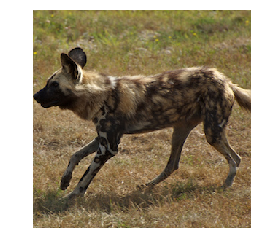

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
test_image = mpimg.imread(os.path.join("images","cnn","test_image.png"))[:, :, :channels]
#test_image.resize((1, height, width, channels)).astype(np.float32)
plt.imshow(test_image)
plt.axis("off")
plt.show()

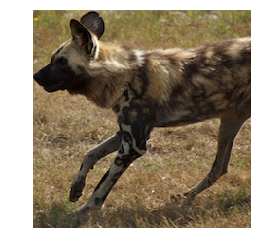

(1, 224, 224, 3)


In [71]:
import numpy as np

# Crop image so it fits in the placeholder
cropped_image = test_image[50:274,0:224]
plt.imshow(cropped_image)
plt.axis("off")
plt.show()
cropped_image = cropped_image.reshape(
    (-1, height, width, channels)).astype(np.float32)
print(cropped_image.shape)

In [161]:
with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  feed_dict = {tf_train_dataset : cropped_image}
  for i in range(2):
      _, l, pred = session.run([optimizer, loss, prediction], feed_dict=feed_dict)

In [162]:
print(l)
print(class_names[np.argmax(pred)])
print(np.argmax(pred))

0.0
hyena, hyaena
276


#### Next I need to train on multiple images, validate, and test